In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

In [5]:
def gaussian_random():
    x = np.random.normal(0, 1)
    return x

def gaussian_function(x, mean=0, std_dev=1):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

def function(X, Y, Z):
    r = X**2 + Y**2 + Z**2
    value = np.exp(-r/2) * (X + Y + Z)**2
    return value

def function_easy(x): 
    value = math.exp(-x**2/2)
    return value

def function_x(x): 
    return x**2

In [6]:
total_value = 0
iteration = 1000000
a = -3
b = 3
X_total = []
Y_total = []
for i in range(iteration):
    X = random.uniform(a, b)
    y = function_easy(X)
    X_total.append(X)
    Y_total.append(y)
    
    
    total_value += y

print(total_value/iteration * (b-a))

2.502820989942193


Estimated value of the integral: 47.28591730099169


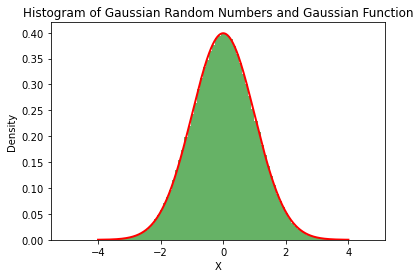

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Monte Carlo integration
num_samples = 1000000

# Generate Gaussian distributed random numbers
X = np.random.normal(0, 1, num_samples)
Y = np.random.normal(0, 1, num_samples)
Z = np.random.normal(0, 1, num_samples)

# Evaluate the function at these points
function_values = function(X, Y, Z)
Y = function_values/(gaussian_function(X, 0, 1)*gaussian_function(Y, 0, 1)*gaussian_function(Z, 0, 1))


# Compute the average value of the function
average_value = np.mean(Y)

# Calculate the integral
integral = average_value 

print(f"Estimated value of the integral: {integral}")

# Plot the histogram of the Gaussian random numbers
plt.hist(X, bins=100, density=True, alpha=0.6, color='g')

# Plot the Gaussian function
x = np.linspace(-4, 4, 1000)
gaussian_values = 1/(np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x, gaussian_values, linewidth=2, color='r')

# Show the plot
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Histogram of Gaussian Random Numbers and Gaussian Function')
plt.show()

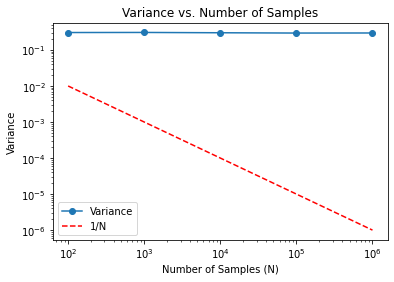

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_function(x, mean=0, std_dev=1):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

def function(X, Y, Z):
    r = X**2 + Y**2 + Z**2
    value = np.exp(-r/2) * (X + Y + Z)**2
    return value

# Function to calculate variance for different sample sizes
def calculate_variance(sample_sizes):
    variances = []
    for num_samples in sample_sizes:
        # Generate Gaussian distributed random numbers
        X = np.random.normal(0, 1, num_samples)
        Y = np.random.normal(0, 1, num_samples)
        Z = np.random.normal(0, 1, num_samples)

        # Evaluate the function at these points
        values = function(X, Y, Z)

        # Calculate the variance of the sampled values
        variance = np.var(values)
        variances.append(variance)
    return variances

# Sample sizes to test
sample_sizes = [100, 1000, 10000, 100000, 1000000]

# Calculate variances for the sample sizes
variances = calculate_variance(sample_sizes)

# Plot the variances against 1/N
plt.plot(sample_sizes, variances, 'o-', label='Variance')
plt.plot(sample_sizes, [1/n for n in sample_sizes], 'r--', label='1/N')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Variance')
plt.title('Variance vs. Number of Samples')
plt.legend()
plt.show()